## Model

<font size=4>The robot's position at time  is given by random variable $Z_i$, which takes on a value in $\{ 0,1,\dots ,11\} \times \{ 0,1,\dots ,7\}$. For example, if , then this means that at time step 2, the robot is in column 5, row 4. Luckily, the robot is quite predictable. At each time step, it makes one of five actions: it stays put, goes left, goes up, goes right, or goes down. But the action it chooses depends on its previous action.

In particular, if its previous action was a movement, it moves in the same direction with probability 0.9 and stays put with probability 0.1. If its previous action was to stay put, it stays again (w.p. 0.2), or moves in any direction (each w.p. 0.2). For example, if the robot's previous action was ‘up', then with probability 0.1, the robot's next action will be ‘stay', and with probability 0.9, the robot's next action will be ‘up'.

We can visually represent these transitions with the following transition diagram (a transition diagram, while graphical and with probabilities is not the same as a probabilistic graphical model; each node in a probabilistic graphical model represents a random variable whereas in a transition diagram, each node is not a random variable but is instead an actual state that a random variable can take on, and the directed edges specify transition probabilities to get to other states):</font>

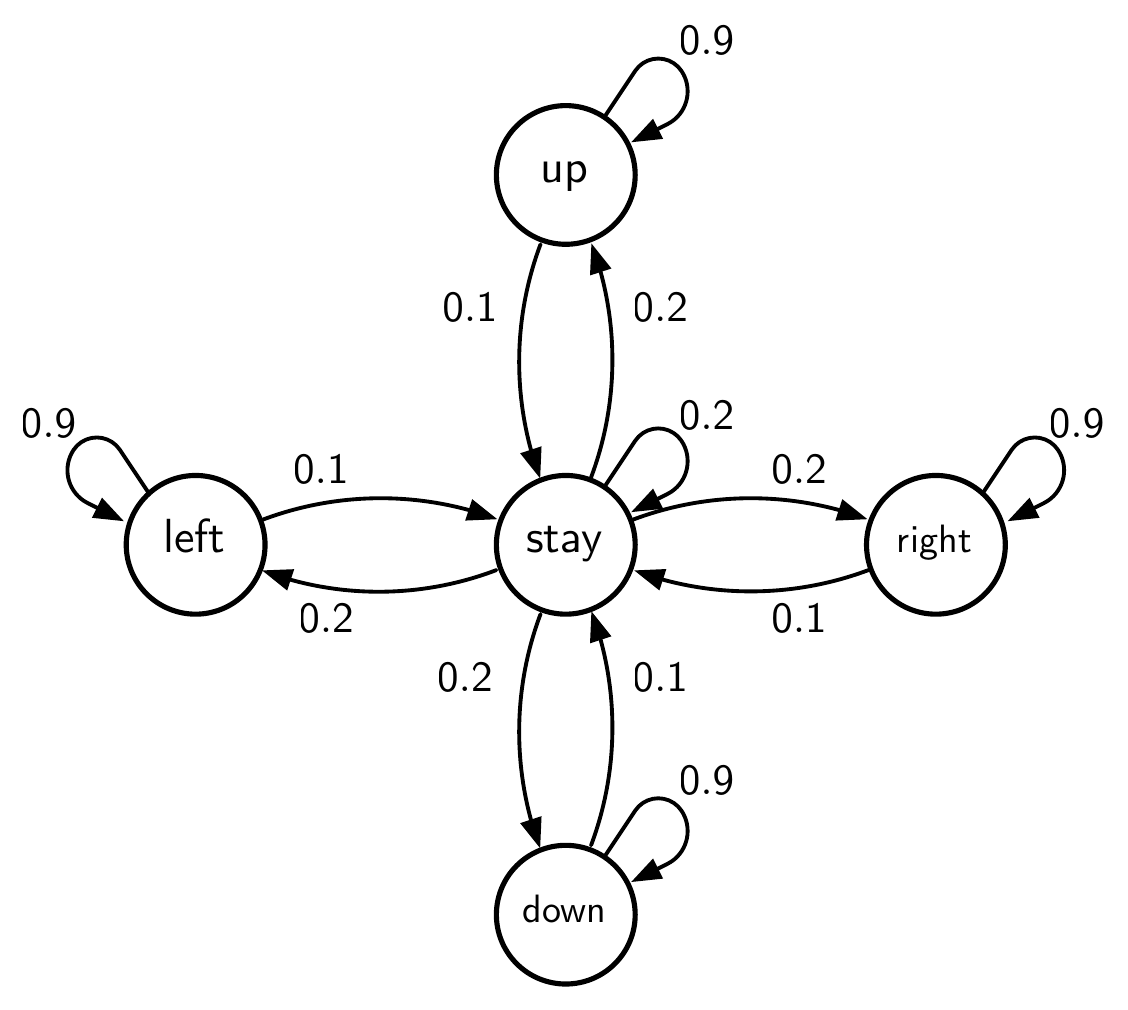

In [9]:
from IPython.display import Image
Image("robot-statetransition.png", width=500, height=500)

<font size=4>There's a catch: We need to treat the boundary of the grid differently. For instance, at the top of the grid, the robot can't go any higher. We'll renormalize the probabilities of its remaining actions at the top so that they sum to 1. Such boundary cases suggest that the transition probabilities depend on the robot's current location and its previous action. Thus, we model the robot's hidden state  at time  to consist of both its location $Z_i$ and the action $A_i$ it last took to reach $Z_i$, i.e., $X_i = (Z_i, A_i)$ as depicted below:</font>

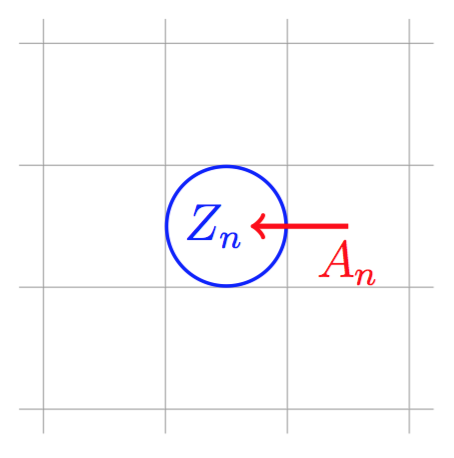

In [10]:
from IPython.display import Image
Image("robot-state.png", width=300, height=300)

<font size=4>The state of the robot $X_i = (Z_i, A_i)$ where red shows action $A_i$ and blue shows position $Z_i$.</font>

<font size=4>Unfortunately, we will not have access to directly observing the robot's hidden state $X_i$. Instead, we have access to a noisy sensor that puts a uniform distribution on valid grid positions within 1 grid cell of the robot's current true position. Also, this noisy sensor only gives a guess as to the robot's current position and tells us nothing about what actions your robot has taken. In other words, at time $i$, we observe $Y_i$, which takes on a value in $\{ 0,1,\dots ,11\} \times \{ 0,1,\dots ,7\}$ as depicted below:</font>

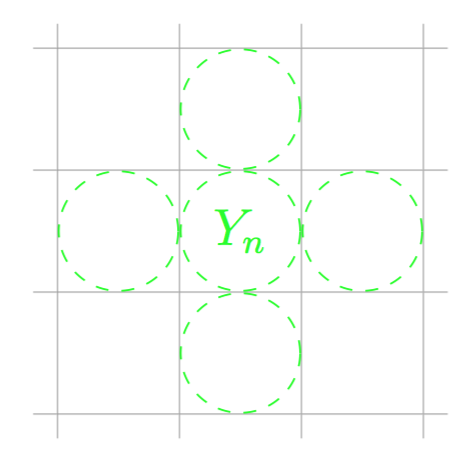

In [11]:
from IPython.display import Image
Image("robot-obs.png", width=300, height=300)